c:\Users\borsm\Desktop\Computational-Biology\.conda\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 0.54
R^2 Score: nan


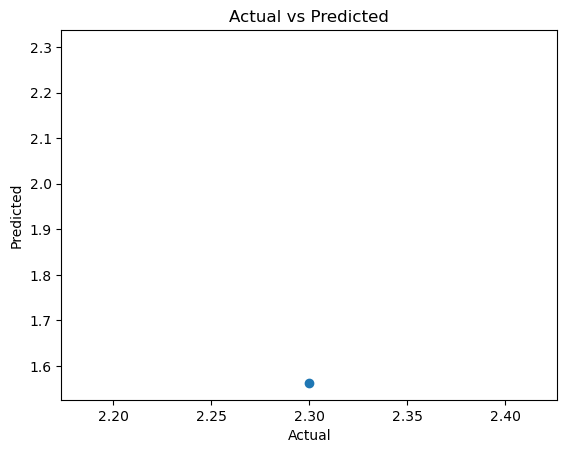

In [5]:
# qsar starter 

import pandas as pd
import numpy as np
from rdkit import Chem
from mordred import descriptors
from mordred import Calculator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Load dataset
data = pd.DataFrame({
    'SMILES': ['CCO', 'CCN', 'CCC', 'CCCl', 'CCBr'],
    'Target': [1.2, 2.3, 1.8, 2.0, 1.5]
})
# Convert SMILES to RDKit molecules
data['Mol'] = data['SMILES'].apply(lambda x:Chem.MolFromSmiles(x))
# Calculate descriptors with Mordred
calc = Calculator(descriptors, ignore_3D=True)
descriptors_df = calc.pandas(data['Mol'])
# Clean data
descriptors_df = descriptors_df.dropna(axis=1, how='all')  # Drop columns with all NaN values
x = descriptors_df.values
y = data['Target'].values
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
# Make predictions
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()